In [8]:
import pickle



with open('../retrieval_results3.pickle', 'rb') as f:
    ir_data = pickle.load(f)

In [9]:
def flatten_pairs(pairs):
    """ Takes a list of tuples with their IR score and returns
        flattened list of sentences. First has the highest score
    """

    seen = set() # Memory to keep track of seen sentences
    ret = list()
    for (f, s), _ in pairs:
        if f not in seen:
            ret.append(f)
            seen.add(f)
        if s not in seen:
            ret.append(s)
            seen.add(s)

    return ret

In [10]:
from enum import Enum


class RecallType(Enum):
    Not = 0
    Partial = 1
    Total = 2

def contains_at_k(instance, pairs, k):
    retrieved = set(flatten_pairs(pairs)[:k])

    gt = instance.gt_path

    counter = 0

    for phrase in gt:
        if phrase in retrieved:
            counter += 1

    kind = RecallType(counter)

    return kind

def contains_at_k_2(instance, hits, k):
    retrieved = set([h.text for h in hits[:k]])

    gt = instance.gt_path

    counter = 0

    for phrase in gt:
        if phrase in retrieved:
            counter += 1

    kind = RecallType(counter)

    return kind


In [11]:
def recall_at_k(data, k):
    partial, total = 0., 0.
    for instance, pairs in data.items():
        kind = contains_at_k(instance, pairs, k)
        if kind == RecallType.Partial:
            partial += 1
        elif kind == RecallType.Total:
            total += 1
            partial += 1

    return partial / len(data), total / len(data)

In [12]:
# Example run
partial, total = recall_at_k(ir_data, 10)
print(partial, total)

0.44639328063241107 0.10017292490118578


In [13]:
from tqdm import tqdm

support = list(range(10, 110, 10))
partial, total = list(), list()
for k in tqdm(support, desc="Computing recall"):
    p, t = recall_at_k(ir_data, k)
    partial.append(p)
    total.append(t)

Computing recall: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


Text(0.5, 1.0, 'Two-step IR based recall')

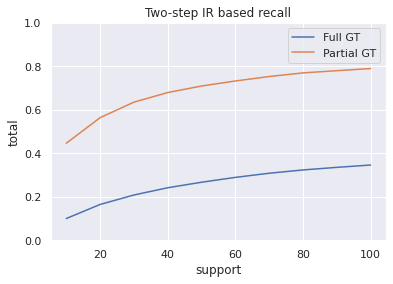

In [14]:
from matplotlib import pyplot as plt
import pandas as pd
# Make the results a data frame for seaborn
fr = pd.DataFrame({"support":support, "partial":partial, "total":total})
import seaborn as sns

# fr.head()
sns.set_theme()
g = sns.lineplot(data=fr, x='support', y='total', label="Full GT")
sns.lineplot(data=fr, x='support', y='partial', label="Partial GT")
g.set_ylim(0, 1.)
g.legend()
g.set_title("Two-step IR based recall")